In [10]:
using Pkg
Pkg.activate(".")
using AutoAI
using Statistics
using Random
using DataFrames: DataFrame
using GR
using Plots
using CSV

  Activating project at `~/phome/julia/AutoMLPipeline.jl/AutoAI`


In [2]:
function ad1(df)
  dfres = DataFrame()
  for learner in keys(AutoAI.CaretAnomalyDetectors.caretadlearner_dict)
    model = CaretAnomalyDetector(learner)
    res = fit_transform!(model, df)
    mname = string(learner)
    dfres = hcat(dfres, DataFrame(mname => res; makeunique=true))
  end
  return dfres
end
function ad2(df)
  clf1 = SKAnomalyDetector("IsolationForest")
  clf2 = SKAnomalyDetector("EllipticEnvelope")
  clf3 = SKAnomalyDetector("OneClassSVM")
  clf4 = SKAnomalyDetector("LocalOutlierFactor")
  res1 = fit_transform!(clf1, df)
  res2 = fit_transform!(clf2, df)
  res3 = fit_transform!(clf3, df)
  res4 = fit_transform!(clf4, df)
  return DataFrame(iso=res1, eli=res2, osvm=res3, lcl=res4)
end
function combine(df)
    a=hcat(ad1(df),ad2(df))
    hcat(a,mean.(eachrow(a)))
end

combine (generic function with 1 method)

In [3]:
df = CSV.File("./data/BilledCost_AmazonElasticComputeCloud.csv") |> DataFrame;

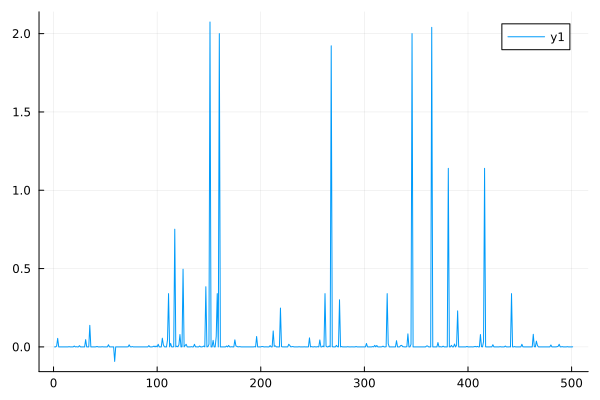

In [4]:
plot(df.BilledCost[1000:1500,:])

In [5]:
dfsum = map(sum, Iterators.partition(df.BilledCost, 500));

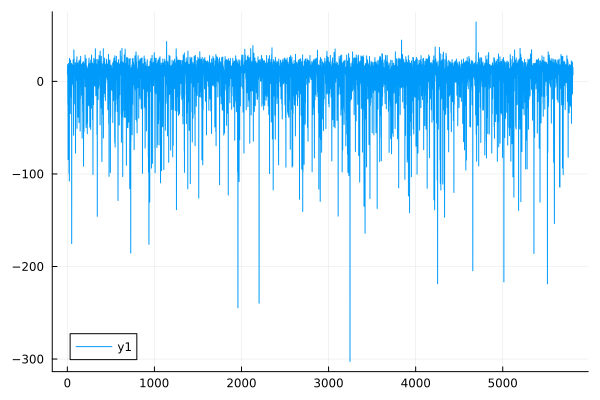

In [6]:
plot(dfsum)

In [7]:
ydf1=combine(DataFrame(:s=>dfsum))

PythonCall.Core.Py


5807×17 DataFrame
  Row │ sod    iforest  histogram  mcd    sos    abod   svm    cluster  pca    ⋯
      │ Int64  Int64    Int64      Int64  Int64  Int64  Int64  Int64    Int64  ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     0        0          0      0      0      0      0        0      0  ⋯
    2 │     0        0          0      0      0      0      0        0      0
    3 │     0        0          0      0      0      0      0        0      0
    4 │     0        0          0      0      0      0      0        0      0
    5 │     0        0          0      0      0      0      0        0      0  ⋯
    6 │     0        0          0      0      0      0      0        0      0
    7 │     0        0          0      0      0      0      0        0      0
    8 │     0        0          0      0      0      0      0        0      0
    9 │     0        1          1      1      0      1      1        1      1  ⋯
   10 │     0        0          0      0      0      0      0        0      0
   11 │     0        0          0      0      0      0      0        0      0
  ⋮   │   ⋮       ⋮         ⋮        ⋮      ⋮      ⋮      ⋮       ⋮       ⋮    ⋱
 5798 │     0        0          0      0      0      0      0        0      0
 5799 │     0        0          0      0      0      0      0        0      0  ⋯
 5800 │     0        0          0      0      0      0      0        0      0
 5801 │     0        0          0      0      0      0      0        0      0
 5802 │     0        0          0      0      0      0      0        0      0
 5803 │     0        0          0      0      0      0      0        0      0  ⋯
 5804 │     0        0          0      0      0      0      0        0      0
 5805 │     0        0          0      0      0      0      0        0      0
 5806 │     0        0          0      0      0      0      0        0      0
 5807 │     0        0          0      0      0      0      0        0      0  ⋯
                                                 8 columns and 5786 rows omitted

In [26]:
# gr(show=true)
# for i in 0.1:0.1:1 
#     ndx=findall(x->x>=i,ydf1.x1)
#     Plots.plot(dfsum, title="AmazonElasticComputeCloud: $(i*100)% voting")
#     Plots.GR.beginprint("plots$i.pdf")
#     Plots.scatter!(ndx,dfsum[ndx])
#     Plots.GR.endprint()
# end

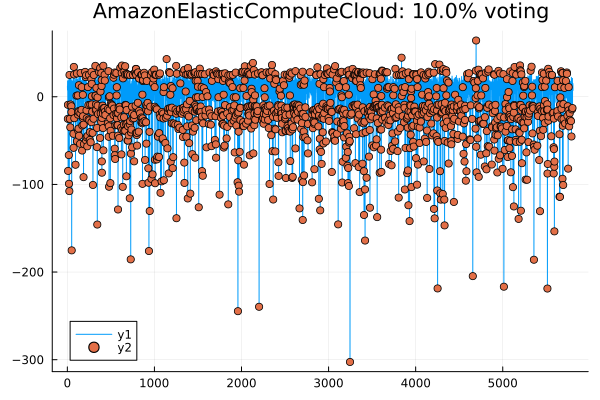

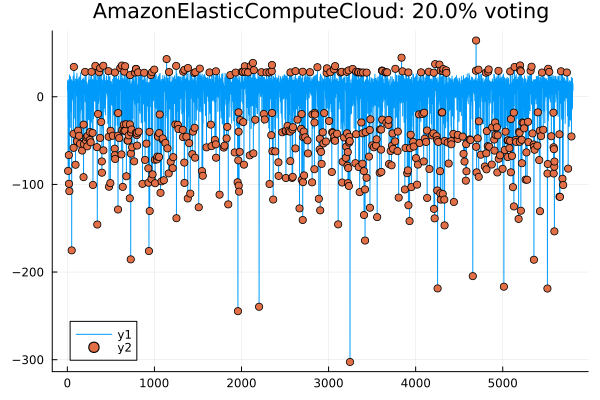

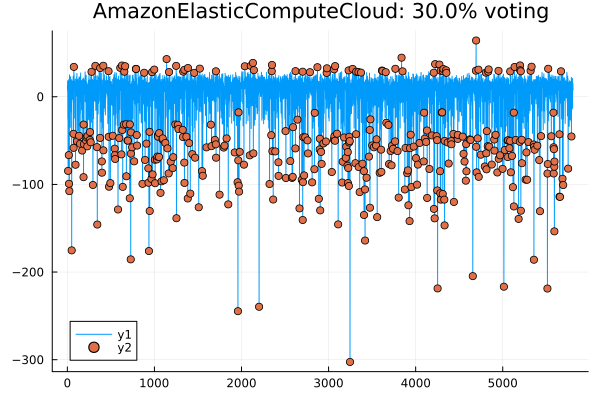

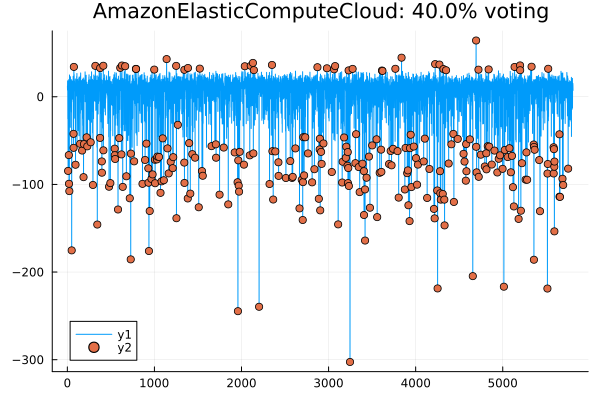

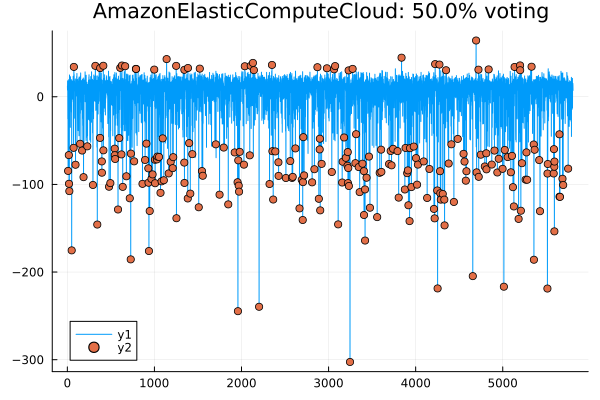

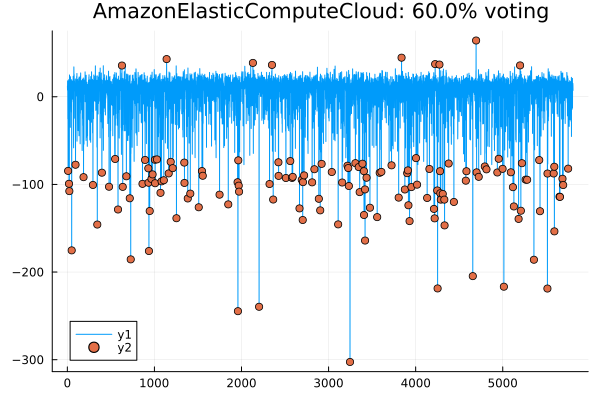

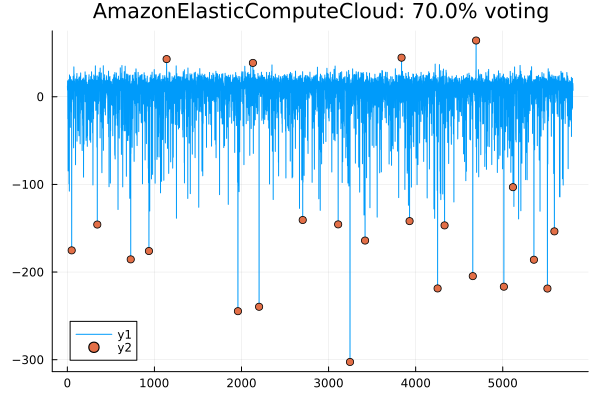

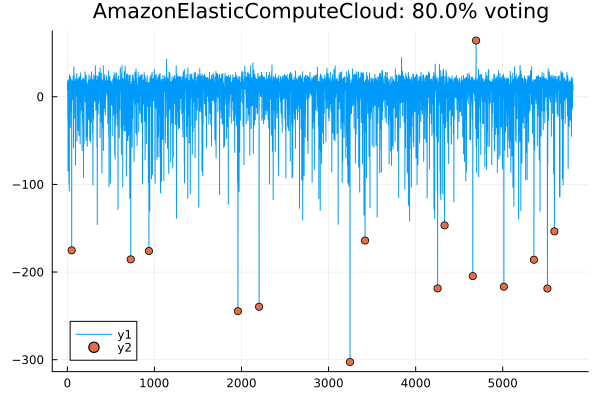

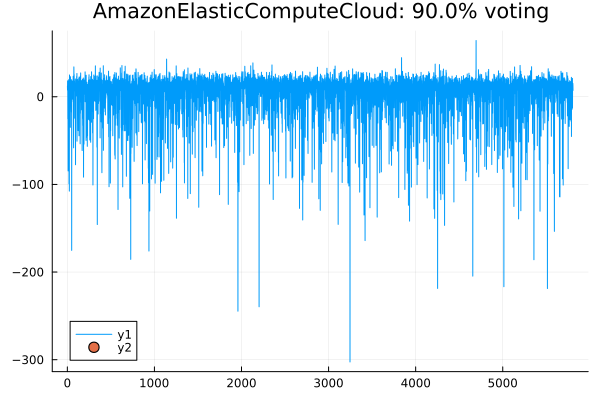

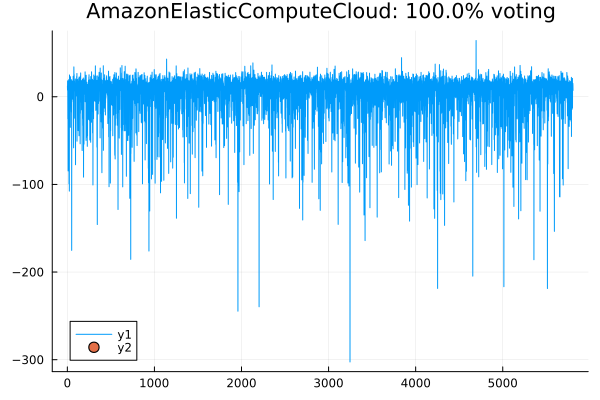

In [36]:
for i in 0.1:0.1:1.0
    ndx=findall(x->x>=i,ydf1.x1)
    Plots.plot(dfsum, title="AmazonElasticComputeCloud: $(i*100)% voting")
    display(Plots.scatter!(ndx,dfsum[ndx]))
end